## Titanic Project Part 2

**Questions to answer:**

What error rate can we expect on the test set?

What is the best model?

What are the most important variables to predict the outcome?




**Classify Titanic passengers using:**

k-Nearest Neighbors classifier (kNN)

Discriminant Analysis

Logistic Regression

In [ ]:
from google.colab import drive
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

# Data pre-processing

In [ ]:
url1 = 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/train.csv'
url2 = 'https://raw.githubusercontent.com/julelnik/titanic_AI/main/test.csv'
train=pd.read_csv(url1)
test=pd.read_csv(url2)

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Tasks for data pre-pocessing:

to deal with missing values;

to recode the variables into categories;

to define the features for the models what will show the highest accuracy scores.









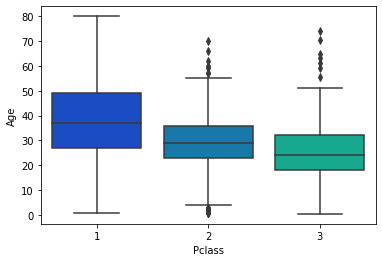

In [ ]:
import seaborn as sb
sb.boxplot(x='Pclass',y='Age',data=train,palette='winter')

From this graph we can find out the mean age for each of the Pclass

In [ ]:
#filling the missing values in age varible based on the relation that has both features : 'Age' and 'Pclass'
def impute(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [ ]:
# applying to dataset
train['Age']=train[['Age','Pclass']].apply(impute,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute,axis=1)

In [ ]:
#missings in embarked filling 
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


From the dataset we can see that 2 missing values were 2 females in 1 class travelling together so we can fill in the missing values with the most frequant value for this type of the passenger.

In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')

# Recoding the values

First let's take a look at the fare variable.

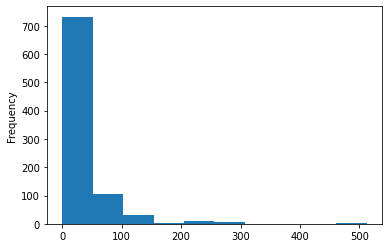

In [ ]:
train.Fare.plot(kind='hist')

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# recoding the Fare into 4 categories from 0 to 3 based of the price range quartiles.
def categorize(fare):
    if fare <= 7:
        return 0
    elif fare <= 14:
        return 1
    elif fare <= 31:
        return 2
    else:
        return 3

In [ ]:
#aplying to data sets
test["FareType"]= test["Fare"].apply(categorize)
train["FareType"]= train["Fare"].apply(categorize)

In [ ]:
# recording sex as binary variable 1 for female and 0 for male
def encodeSex(x):
    if x=="male":
        return 0
    if x=="female":
        return 1

In [ ]:
#applying to datasets
train['SexCode'] = train['Sex'].apply(encodeSex)
test['SexCode'] = test['Sex'].apply(encodeSex)

Let's record the age variable into categories based on....

In [ ]:
train['Age'].describe()

count    891.000000
mean      29.100079
std       13.265936
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Added by Eduardo 
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
# recoding the age into 4 categories based of the age range for survived
def categorize_Age(x):
    if x <= 16:
        return 0
    elif x <= 32:
        return 1
    elif x <= 48:
        return 2
    elif x <= 64:
        return 3
    elif x <= 80:
        return 4

In [ ]:
#applying to dataset
train['Age_cat']=train['Age'].apply(categorize_Age)
test['Age_cat']=test['Age'].apply(categorize_Age)

Recoding Embarked to int categories from 0 to 2 based on the % of survived from each port (from less to more).

In [ ]:
train.groupby(by=["Embarked"])["Survived"].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [ ]:
train['Embarked_code'] = train['Embarked'].map( {'Q': 0, 'C': 1, 'S': 2} ).astype(int)
test['Embarked_code'] = test['Embarked'].map( {'Q': 0, 'C': 1, 'S': 2} ).astype(int)

In [ ]:
#final data set for analysis
train_cleaned = train.drop(['PassengerId','Name','Sex', 'Age', 'Fare', 'Ticket', 'Embarked', 'Cabin'], axis=1)
train_cleaned.shape

(891, 9)

In [ ]:
train_cleaned

,Survived,Pclass,SibSp,Parch,FareType,SexCode,AgeBand,Age_cat,Embarked_code
0,0,3,1,0,1,0,"(16.336, 32.252]",1,2
1,1,1,1,0,3,1,"(32.252, 48.168]",2,1
2,1,3,0,0,1,1,"(16.336, 32.252]",1,2
3,1,1,1,0,3,1,"(32.252, 48.168]",2,2
4,0,3,0,0,1,0,"(32.252, 48.168]",2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,"(16.336, 32.252]",1,2
887,1,1,0,0,2,1,"(16.336, 32.252]",1,2
888,0,3,1,2,2,1,"(16.336, 32.252]",1,2
889,1,1,0,0,2,0,"(16.336, 32.252]",1,1


In [ ]:
test_cleaned = test.drop(['PassengerId','Name','Sex', 'Age', 'Fare', 'Ticket', 'Embarked', 'Cabin'], axis=1)
test_cleaned.shape

(418, 7)

In [ ]:
test_cleaned

,Pclass,SibSp,Parch,FareType,SexCode,Age_cat,Embarked_code
0,3,0,0,1,0,2,0
1,3,1,0,0,1,2,2
2,2,0,0,1,0,3,0
3,3,0,0,1,0,1,2
4,3,1,1,1,1,1,2
...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,2
414,1,0,0,3,1,2,1
415,3,0,0,1,0,2,2
416,3,0,0,1,0,1,2


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold, StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation: CROSS VALIDATION
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


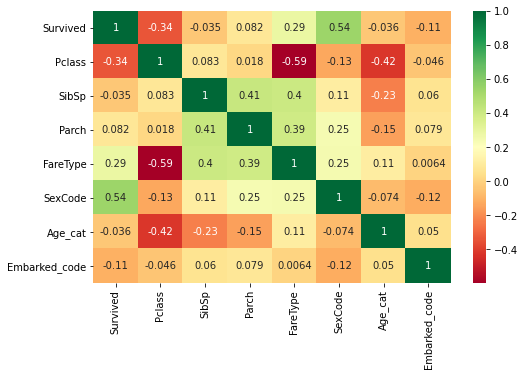

In [ ]:
# to choose the varibles for predictive model let's see the correlation 
plt.subplots(figsize=(8, 5))
sns.heatmap(train_cleaned.corr(), annot=True, cmap="RdYlGn")
plt.show()

The feautures for the model are passenager class, number of siblings , parents, parnters on board, type of the fare, sex, age, Embarked port

In [ ]:
#defining the features and response for the model 
X = train_cleaned.drop(['Survived', 'AgeBand'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)
logreg=LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy =logreg.score(X_test, y_test) 

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       140
           1       0.86      0.71      0.78        83

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223



The model predict the survival level at 85% level.




Text(0.5, 15.0, 'Predicted Value')

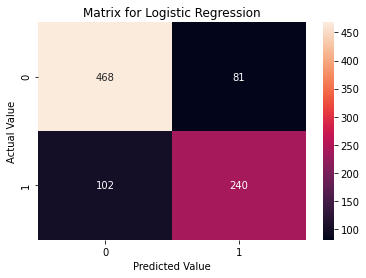

In [ ]:
#Kfold
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(logreg, X_scaled, y, cv = kfold, scoring = "accuracy")
cv_result.mean() # mean accuracy of kfold

fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(logreg,X_scaled,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for Logistic Regression')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

The number of correct predictions for not survived are 475 and for survived 237.

In [ ]:
# I tried this package to see details about model
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model = sm.Logit(y_test, X_test)
result = model.fit(method='newton')
result.summary()


Optimization terminated successfully.
         Current function value: 0.412976
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.374     
Dependent Variable: Survived         AIC:              198.1874  
Date:               2020-10-29 13:50 BIC:              222.0376  
No. Observations:   223              Log-Likelihood:   -92.094   
Df Model:           6                LL-Null:          -147.21   
Df Residuals:       216              LLR p-value:      1.8299e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5856      0.2811    -2.0837    0.0372    -1.1365    -0.0348
x2    -0.7066      0.2677    -2.6392    0.0083    -1.2314    -0.1819
x3    -0.1319      0.2376    -0.5550    0.5789    -0.5976     0.3339
x4     0.8467      0.2885     2.9347    0.0033     0.2812     1.4122
x5     1.4867      0.2134     6.9665    0.0000     1.0684     1.9049
x6    -0.4975      0.2326    -2.1393    0.0324    -0.9533    -0.0417
x7    -0.0407      0.1895    -0.2147    0.8300    -0.4121     0.3307
=================================================================

"""

### LDA Eduardo

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
"""
X = train_cleaned.drop(['Survived'], axis=1)
stdscale=StandardScaler()
X_scaled = stdscale.fit_transform(X)
y = train.Survived.copy()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)


SyntaxError: ignored

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
Y_pred = lda.predict(X_test)
acc_lda = round(lda.score(X_train,y_train) * 100, 2)
acc_lda

In [ ]:
"""
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

plt.figure()
plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.8, color=colors,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Titanic dataset')

plt.show()

SyntaxError: ignored

In [ ]:
X = train_cleaned[['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']].values
y = train_cleaned['Survived'].values

from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaModel = LinearDiscriminantAnalysis().fit(X_train,y_train)
yhat = ldaModel.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, ldaModel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7879213483146067
Test set Accuracy:  0.8212290502793296


Text(0.5, 15.0, 'Predicted Value')

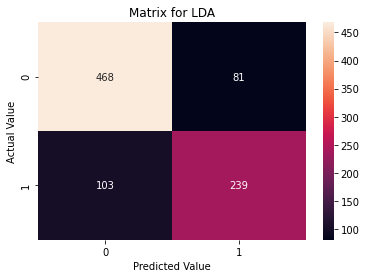

In [ ]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_result = cross_val_score(ldaModel, X_scaled, y, cv = kfold, scoring = "accuracy")
cv_result.mean() # mean accuracy of kfold

fig=plt.subplot()
ax=plt.gca()
y_pred = cross_val_predict(ldaModel,X_scaled,y,cv=kfold)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
ax.set_title('Matrix for LDA')
ax.set_ylabel('Actual Value')
ax.set_xlabel('Predicted Value')

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qdaModel = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
yhat = qdaModel.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, qdaModel.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7935393258426966
Test set Accuracy:  0.8268156424581006


## k-Nearest Neighbors classifier (kNN) - Gabriel Pérez

In [ ]:
train_cleaned.head(5)

,Survived,Pclass,SibSp,Parch,FareType,SexCode,AgeBand,Age_cat,Embarked_code
0,0,3,1,0,1,0,"(16.336, 32.252]",1,2
1,1,1,1,0,3,1,"(32.252, 48.168]",3,1
2,1,3,0,0,1,1,"(16.336, 32.252]",1,2
3,1,1,1,0,3,1,"(32.252, 48.168]",2,2
4,0,3,0,0,1,0,"(32.252, 48.168]",2,2


In [ ]:
train_cleaned.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode',
       'AgeBand', 'Age_cat', 'Embarked_code'],
      dtype='object')

In [ ]:
X = train_cleaned[['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']].values
X[:5]

array([[3, 1, 0, 1, 0, 1, 2],
       [1, 1, 0, 3, 1, 3, 1],
       [3, 0, 0, 1, 1, 1, 2],
       [1, 1, 0, 3, 1, 2, 2],
       [3, 0, 0, 1, 0, 2, 2]])

In [ ]:
y = train_cleaned['Survived'].values
y[:5]

array([0, 1, 1, 1, 0])

In [ ]:
from sklearn import preprocessing

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance. But In this case it decreases the performance of the model.

In [ ]:
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:5]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

We can calculate the accuracy of KNN for different Ks. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

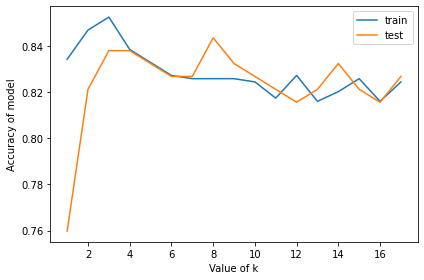

In [ ]:
N = 18
train_accuracy = []
test_accuracy = []
for k in range(1,N):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    train_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    test_accuracy.append(metrics.accuracy_score(y_test, y_hat))

plt.plot(range(1,N), train_accuracy, label='train')
plt.plot(range(1,N), test_accuracy, label='test')
plt.legend(loc='best')
plt.xlabel('Value of k')
plt.ylabel('Accuracy of model')
plt.tight_layout()
plt.show()

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76, 0.82, 0.84, 0.84, 0.83, 0.83, 0.83, 0.84, 0.83])

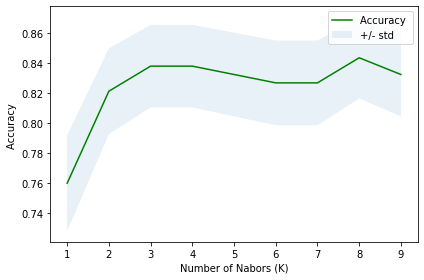

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was 0.8435754189944135 with k= 8


In [ ]:
k = 8
#Train Model and Predict  
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
yhat = knn_model.predict(X_test)
yhat[0:5]

array([0, 0, 1, 0, 0])

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8258426966292135
Test set Accuracy:  0.8435754189944135


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 40  20]
 [  8 111]]


Confusion matrix, without normalization
[[ 40  20]
 [  8 111]]


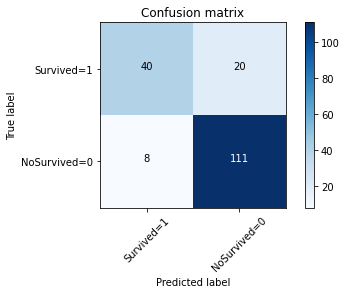

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','NoSurvived=0'],normalize= False,  title='Confusion matrix')

Matthews Correlation Coefitient confirm that k = 8 gives the best results

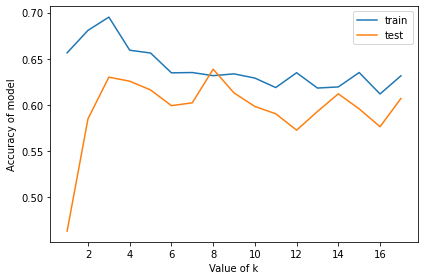

In [ ]:
N = 18
train_mcc = []
test_mcc = []
for k in range(1,N):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_hat = neigh.predict(X_test)
    train_mcc.append(metrics.matthews_corrcoef(y_train, neigh.predict(X_train)))
    test_mcc.append(metrics.matthews_corrcoef(y_test, y_hat))

plt.plot(range(1,N), train_mcc, label='train')
plt.plot(range(1,N), test_mcc, label='test')
plt.legend(loc='best')
plt.xlabel('Value of k')
plt.ylabel('Accuracy of model')
plt.tight_layout()
plt.show()

## Model Comparison

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [ ]:
y_KNN_hat = knn_model.predict(X_test)
y_LDA_hat = ldaModel.predict(X_test)
y_QDA_hat = qdaModel.predict(X_test)
y_LR_hat = logreg.predict(X_test)

In [ ]:
print("F1 of KNN: ", f1_score(y_test, y_KNN_hat, average='weighted'))
print("F1 of LDA: ", f1_score(y_test, y_LDA_hat, average='weighted'))
print("F1 of QDA: ", f1_score(y_test, y_QDA_hat, average='weighted'))
print("F1 of LR: ", f1_score(y_test, y_LR_hat, average='weighted'))

print("Jaccard of KNN: ", jaccard_similarity_score(y_test, y_KNN_hat))
print("Jaccard of LDA: ", jaccard_similarity_score(y_test, y_LDA_hat))
print("Jaccard of QDA: ", jaccard_similarity_score(y_test, y_QDA_hat))
print("Jaccard of LR: ", jaccard_similarity_score(y_test, y_LR_hat))

F1 of KNN:  0.8386393544382372
F1 of LDA:  0.8229498355931758
F1 of QDA:  0.8324022346368715
F1 of LR:  0.5309512204266806
Jaccard of KNN:  0.8435754189944135
Jaccard of LDA:  0.8268156424581006
Jaccard of QDA:  0.8324022346368715
Jaccard of LR:  0.664804469273743


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
from sklearn.metrics import log_loss
yhat_LR_prob = logreg.predict_proba(X_test)
print("Log loss of LR: ", log_loss(y_test, yhat_LR_prob))

Log loss of LR:  0.9487291789615745


## Comparison Table

| Algorithm | Accuracy/Jaccard | F1-score | Logloss|
| --- | --- | --- | --- |
| kNN | 0.8435 | 0.8386 | NA|
| LDA | 0.8268 | 0.8229 | NA|
| QDA | 0.8324 | 0.8324 | NA|
| LR | 0.6648 | 0.5309 | 0.9487|

## Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(knn_model, X_test, y_KNN_hat, n_repeats=10, random_state=0)
result

{'importances': array([[0.11, 0.12, 0.07, 0.12, 0.09, 0.09, 0.09, 0.11, 0.13, 0.12],
        [0.07, 0.07, 0.07, 0.05, 0.07, 0.09, 0.07, 0.08, 0.07, 0.07],
        [0.04, 0.04, 0.03, 0.06, 0.06, 0.05, 0.06, 0.06, 0.04, 0.06],
        [0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.05, 0.04, 0.08, 0.07],
        [0.14, 0.16, 0.18, 0.2 , 0.19, 0.2 , 0.19, 0.21, 0.18, 0.16],
        [0.09, 0.08, 0.1 , 0.07, 0.12, 0.11, 0.09, 0.09, 0.08, 0.09],
        [0.06, 0.06, 0.06, 0.07, 0.06, 0.04, 0.07, 0.06, 0.04, 0.05]]),
 'importances_mean': array([0.11, 0.07, 0.05, 0.07, 0.18, 0.09, 0.06]),
 'importances_std': array([0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01])}

In [ ]:
indices = np.argsort(result.importances_mean)[::-1]
indices

array([4, 0, 5, 1, 3, 6, 2])

In [ ]:
features = ['Pclass', 'SibSp', 'Parch', 'FareType', 'SexCode', 'Age_cat', 'Embarked_code']

In [ ]:
result.importances_mean[indices]

array([0.18, 0.11, 0.09, 0.07, 0.07, 0.06, 0.05])

In [ ]:
result.importances_std[indices]

array([0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01])

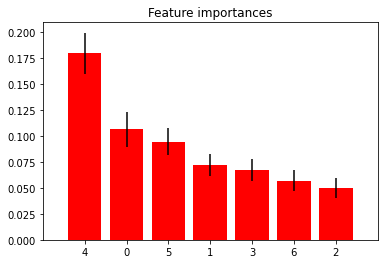

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), result.importances_mean[indices],
        color="r", yerr=result.importances_std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()